1. Difficulty evaluation using trajectory rewards

Visualization of the state

tensor([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]])
0 <class 'pendulum.state.PendulumState'>
1 <class 'pendulum.state.PendulumState'>


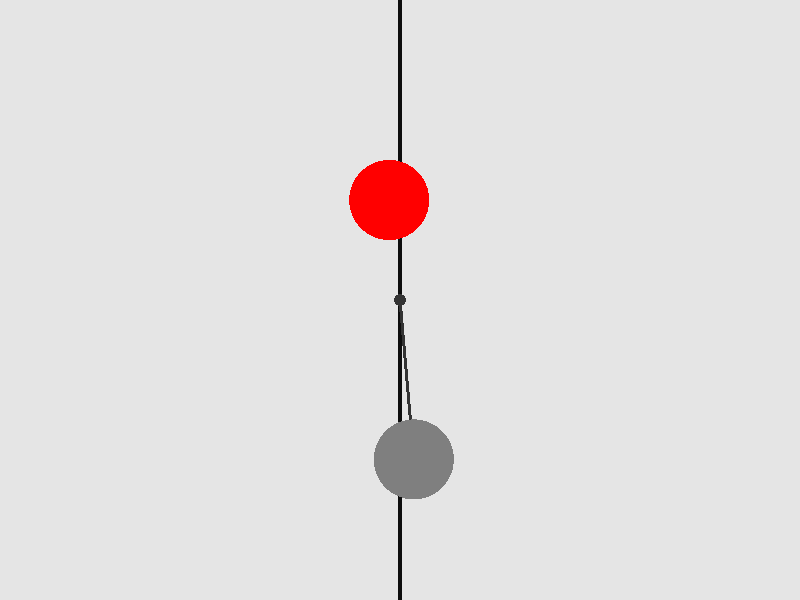

In [1]:
import torch

from framework import TrajectoryRewardsEvaluator
from pendulum import PendulumEnvironment, PendulumRenderer
from pendulum.heuristic import *
from shared_parameters import *

env = PendulumEnvironment(*pendulum_env_args, time_scale=5, step_reward=1.0, action_reward=-0.1, death_reward=-100.0)
renderer = PendulumRenderer(bob_radius, connector_length, enemy_radius, enemy_y)

renderer.render(env.get_starting_state(), to_image=True)

### Note for all difficulty estimator

Currently, we have a small embedding space (just one dimension),
thus it's possible to pre-evaluate it directly, and then use the
cached difficulty evaluations.

Within the bigger space it's not possible, and we will have to
come up with some clever way of caching, where we don't store the
evaluation for every point space, but neither perform an evaluation
each time for each point.

### Direct difficulty estimation

In [2]:
oracle = HeuristicPendulumEvaluator(connector_length, max_angle, enemy_radius, bob_radius)
state = env.get_starting_state()
difficulty = oracle(state)

print(state.to_string())
print(f"difficulty={difficulty.item():.3f}")

Pendulum(angle: 0.64, angular_speed: 0.05, vertical_position: 0.00, enemies: 0.10)
difficulty=0.653


### Difficulty estimation using trajectory rewards

In [5]:
skills = [1.0, 0.5, 0.0]
weights = [0.5, 0.25, 0.25]
agents = [HeuristicPendulumActor(enemy_radius, bob_radius, connector_length, enemy_y, skill=skill) for skill in skills]
oracle = TrajectoryRewardsEvaluator(env, agents, weights, num_evaluations=10, max_trajectory_length=20)

states = torch.vstack([env.get_starting_state() for _ in range(10)])
oracle.evaluate(states)

tensor([0.0508, 0.8492, 0.8199, 0.7940, 0.2215, 0.8766, 0.9208, 0.1729, 0.2449,
        0.1724])